In [175]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from flodules.WLimport import sudsWebV2#, fiman, noaa, adcirc, convert2csv, rain, threeDi, c2csvWind
#import cmocean
#from matplotlib.colors import ListedColormap

#import numpy as np

In [8]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [90]:
atmPath = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\20230522-0725_cbGauge_Barometric_Pressure.csv"
atmDF = pd.read_csv(atmPath, parse_dates = ['Reading'], thousands=',')
atmDF.index = atmDF['Reading']
atmDF = atmDF.iloc[:,2:-2]
atmDF.rename(columns={'Value': 'Atm Pressure (mbar)'}, inplace = True)
atmDF = atmDF.sort_index(ascending=True)
if atmDF['Atm Pressure (mbar)'].min() < 20:
    atmDF['Atm Pressure (mbar)'] = atmDF['Atm Pressure (mbar)'] + 1000
else:
    print("atmospheric pressure values < 1000 broke this iteration of the code\n"
          "revist how commas in the thousandth place of atm pressure data are handled")

print(atmDF['Atm Pressure (mbar)'].min())

atmDF

1003.4


,Atm Pressure (mbar)
Reading,
2023-05-22 00:06:07,1017.3
2023-05-22 00:16:05,1017.2
2023-05-22 00:26:13,1017.1
2023-05-22 00:36:10,1017.1
2023-05-22 00:46:08,1017.1
...,...
2023-07-25 23:16:18,1019.1
2023-07-25 23:26:16,1019.1
2023-07-25 23:36:24,1019.1


In [111]:
hobo_CB03 = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\HOBO_NCSU03_CB03\HOBO_NCSU03_CB03_20230725.csv"
hoboDF = pd.read_csv(hobo_CB03, parse_dates = ['Date Time, GMT-04:00'], index_col = 1, skiprows=1)

""
"Date Time, GMT-04:00"
2023-05-22 11:59:12
2023-05-22 11:59:36
2023-05-22 12:04:12
2023-05-22 12:09:12
2023-05-22 12:14:12
...
2023-07-25 12:49:12
2023-07-25 12:54:12
2023-07-25 12:55:48


In [134]:
def hoboIn(hoboPath, atmPath, hoboSerialNumber):
    #hoboPath = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\HOBO_NCSU03_CB03\HOBO_NCSU03_CB03_20230725.csv"
    #atmPath = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\20230522-0725_cbGauge_Barometric_Pressure.csv"
    hoboDF = pd.read_csv(hoboPath, parse_dates = ['Date Time, GMT-04:00'], index_col = 1, skiprows=1)
    hoboDF = hoboDF.iloc[:,:-5]
    hoboDFmax = hoboDF.index.max()
    hoboDFmin = hoboDF.index.min()

    atmDF = pd.read_csv(atmPath, parse_dates = ['Reading'])
    atmDF.index = atmDF['Reading']
    atmDF = atmDF.iloc[:,2:-2]
    atmDF.rename(columns={'Value': 'Atm Pressure (mbar)'}, inplace = True)
    if atmDF['Atm Pressure (mbar)'].min() < 20:
        atmDF['Atm Pressure (mbar)'] = atmDF['Atm Pressure (mbar)'] + 1000
    else:
        print("atmospheric pressure values < 1000 broke this iteration of the code\n"
              "revist how commas in the thousandth place of atm pressure data are handled")
    atmDF = atmDF.sort_index(ascending=True)
    atmDF = atmDF.loc[hoboDFmin:hoboDFmax]

    hoboDF = pd.merge_asof(atmDF, hoboDF, left_index=True, right_index=True)
    
    hoboDF['atm adjusted Pres (mbar or cm H20)'] = hoboDF[f'Abs Pres, kPa (LGR S/N: {hoboSerialNumber}, SEN S/N: {hoboSerialNumber})']*10 - hoboDF['Atm Pressure (mbar)']
    return(hoboDF)

In [135]:
hobo_CB03 = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\HOBO_NCSU03_CB03\HOBO_NCSU03_CB03_20230725.csv"

atm = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\20230522-0725_cbGauge_Barometric_Pressure.csv"
cb03df = hoboIn(hobo_CB03, atm, 21352931)

In [136]:
cb03df.head(10)


,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352931, SEN S/N: 21352931)","Temp, °C (LGR S/N: 21352931, SEN S/N: 21352931)",atm adjusted Pres (mbar or cm H20)
Reading,,,,,
2023-05-22 12:06:08,1018.6,3,103.791,28.357,19.31
2023-05-22 12:16:06,1018.4,5,103.739,31.880,18.99
2023-05-22 12:26:13,1018.5,7,103.729,32.086,18.79
2023-05-22 12:36:11,1018.4,9,103.741,31.983,19.01
2023-05-22 12:46:08,1018.4,11,103.718,31.676,18.78
2023-05-22 12:56:07,1018.5,13,103.713,31.472,18.63
2023-05-22 13:06:15,1018.4,15,103.720,31.166,18.80
2023-05-22 13:16:12,1018.2,17,103.699,30.963,18.79
2023-05-22 13:26:11,1018.0,19,100.665,29.853,-11.35


In [137]:
cb03df.tail(10)

,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352931, SEN S/N: 21352931)","Temp, °C (LGR S/N: 21352931, SEN S/N: 21352931)",atm adjusted Pres (mbar or cm H20)
Reading,,,,,
2023-07-25 11:26:22,1019.6,18430,101.778,35.756,-1.82
2023-07-25 11:36:19,1019.6,18432,104.633,31.370,26.73
2023-07-25 11:46:18,1019.6,18434,104.651,29.853,26.91
2023-07-25 11:56:15,1019.5,18436,104.649,29.752,26.99
2023-07-25 12:06:24,1019.5,18438,104.639,29.953,26.89
2023-07-25 12:16:22,1019.6,18440,101.719,32.086,-2.41
2023-07-25 12:26:19,1019.6,18442,101.792,32.600,-1.68
2023-07-25 12:36:17,1019.6,18444,101.794,32.704,-1.66
2023-07-25 12:46:25,1019.7,18446,101.817,32.394,-1.53


In [172]:
# HOBO drift correction
# Initial measured water level offset (HOBO measurement - Bucket Depth, mbar) = -1
# Final measured water level offset (HOBO measurement - Bucket Depth, mbar) = -3

cb03df["atm+drift corrected WL (cm)"] = cb03df["atm adjusted Pres (mbar or cm H20)"] + 2

# cb03 hobo elev = 0.76 ft navd88 = 0.23 m NAVD88
# cb03 road elev = 3.05 ft navd88 = 0.93 m NAVD88

cb03df['HOBO WL rel to road (m)'] = cb03df['atm+drift corrected WL (cm)']/100 - 0.7

cb03df


,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352931, SEN S/N: 21352931)","Temp, °C (LGR S/N: 21352931, SEN S/N: 21352931)",atm adjusted Pres (mbar or cm H20),atm+drift corrected WL (cm),HOBO WL rel to road (m)
Reading,,,,,,,
2023-05-22 12:06:08,1018.6,3,103.791,28.357,19.31,21.31,-0.4869
2023-05-22 12:16:06,1018.4,5,103.739,31.880,18.99,20.99,-0.4901
2023-05-22 12:26:13,1018.5,7,103.729,32.086,18.79,20.79,-0.4921
2023-05-22 12:36:11,1018.4,9,103.741,31.983,19.01,21.01,-0.4899
2023-05-22 12:46:08,1018.4,11,103.718,31.676,18.78,20.78,-0.4922
...,...,...,...,...,...,...,...
2023-07-25 12:16:22,1019.6,18440,101.719,32.086,-2.41,-0.41,-0.7041
2023-07-25 12:26:19,1019.6,18442,101.792,32.600,-1.68,0.32,-0.6968
2023-07-25 12:36:17,1019.6,18444,101.794,32.704,-1.66,0.34,-0.6966


In [138]:
hobo_CB01 = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\HOBO_NCSU04_CB01\HOBO_NCSU04_CB01_20230725.csv"

cb01df = hoboIn(hobo_CB01, atm, 21352933)

cb01df

,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352933, SEN S/N: 21352933)","Temp, °C (LGR S/N: 21352933, SEN S/N: 21352933)",atm adjusted Pres (mbar or cm H20)
Reading,,,,,
2023-05-22 12:06:08,1018.6,2,NaN,NaN,NaN
2023-05-22 12:16:06,1018.4,4,103.642,30.659,18.02
2023-05-22 12:26:13,1018.5,6,103.657,31.880,18.07
2023-05-22 12:36:11,1018.4,8,103.657,31.880,18.17
2023-05-22 12:46:08,1018.4,10,103.652,31.676,18.12
...,...,...,...,...,...
2023-07-25 12:06:24,1019.5,18437,104.695,29.853,27.45
2023-07-25 12:16:22,1019.6,18439,101.835,31.880,-1.25
2023-07-25 12:26:19,1019.6,18441,101.830,33.014,-1.30


In [139]:
cb01df.head(10)


,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352933, SEN S/N: 21352933)","Temp, °C (LGR S/N: 21352933, SEN S/N: 21352933)",atm adjusted Pres (mbar or cm H20)
Reading,,,,,
2023-05-22 12:06:08,1018.6,2,NaN,NaN,NaN
2023-05-22 12:16:06,1018.4,4,103.642,30.659,18.02
2023-05-22 12:26:13,1018.5,6,103.657,31.880,18.07
2023-05-22 12:36:11,1018.4,8,103.657,31.880,18.17
2023-05-22 12:46:08,1018.4,10,103.652,31.676,18.12
2023-05-22 12:56:07,1018.5,12,103.629,31.472,17.79
2023-05-22 13:06:15,1018.4,14,103.623,31.268,17.83
2023-05-22 13:16:12,1018.2,16,103.615,30.963,17.95
2023-05-22 13:26:11,1018.0,18,100.608,30.760,-11.92


In [140]:
cb01df.tail(10)

,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352933, SEN S/N: 21352933)","Temp, °C (LGR S/N: 21352933, SEN S/N: 21352933)",atm adjusted Pres (mbar or cm H20)
Reading,,,,,
2023-07-25 11:16:24,1019.7,18427,101.737,41.458,-2.33
2023-07-25 11:26:22,1019.6,18429,101.714,41.225,-2.46
2023-07-25 11:36:19,1019.6,18431,104.685,35.222,27.25
2023-07-25 11:46:18,1019.6,18433,104.738,30.154,27.78
2023-07-25 11:56:15,1019.5,18435,104.707,29.652,27.57
2023-07-25 12:06:24,1019.5,18437,104.695,29.853,27.45
2023-07-25 12:16:22,1019.6,18439,101.835,31.880,-1.25
2023-07-25 12:26:19,1019.6,18441,101.830,33.014,-1.30
2023-07-25 12:36:17,1019.6,18443,101.803,33.953,-1.57


In [179]:
# HOBO drift correction - CB01
# Initial measured water level offset (HOBO measurement - Bucket Depth, mbar) = -2
# Final measured water level offset (HOBO measurement - Bucket Depth, mbar) = -3

cb01df["atm+drift corrected WL (cm)"] = cb01df["atm adjusted Pres (mbar or cm H20)"] + 3

# cb01 hobo elev = 0.43 ft navd88 = 0.13 m NAVD88
# cb01 road elev = 2.38 ft navd88 = 0.73 m NAVD88

cb01df['HOBO WL rel to road (m)'] = cb01df['atm+drift corrected WL (cm)']/100 - 0.6

cb01df

,Atm Pressure (mbar),#,"Abs Pres, kPa (LGR S/N: 21352933, SEN S/N: 21352933)","Temp, °C (LGR S/N: 21352933, SEN S/N: 21352933)",atm adjusted Pres (mbar or cm H20),atm+drift corrected WL (cm),HOBO WL rel to road (m)
Reading,,,,,,,
2023-05-22 12:06:08,1018.6,2,NaN,NaN,NaN,NaN,NaN
2023-05-22 12:16:06,1018.4,4,103.642,30.659,18.02,21.02,-0.3898
2023-05-22 12:26:13,1018.5,6,103.657,31.880,18.07,21.07,-0.3893
2023-05-22 12:36:11,1018.4,8,103.657,31.880,18.17,21.17,-0.3883
2023-05-22 12:46:08,1018.4,10,103.652,31.676,18.12,21.12,-0.3888
...,...,...,...,...,...,...,...
2023-07-25 12:06:24,1019.5,18437,104.695,29.853,27.45,30.45,-0.2955
2023-07-25 12:16:22,1019.6,18439,101.835,31.880,-1.25,1.75,-0.5825
2023-07-25 12:26:19,1019.6,18441,101.830,33.014,-1.30,1.70,-0.5830


In [180]:
# import suds data
cb01sudsPath = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\SuDSdata\CB_01_20230522_20230724.csv"
cb03sudsPath = r"C:\Users\ththelen\University of North Carolina at Chapel Hill\SunnyD Flood Sensor Network - Documents\Carolina Beach\Site_Visits\20230725_HOBOretrival\HOBOdata\SuDSdata\CB_03_20230522_20230724.csv"

cb03sudsDF = sudsWebV2(cb03sudsPath, 'et')
cb01sudsDF = sudsWebV2(cb01sudsPath, 'et')

cb01sudsDF[1000:] # sensor elev changed from o.34 ft to o.43 ft NAVD88 on 5/24/2023


,sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),SUDS WL (m NAVD88),SUDS WL (m above road),Measurement Time (UTC),Measurement Time (US/Eastern)
Measurement Time (US/Eastern),,,,,,,,
2023-05-26 06:03:00,0.43,2.38,0.79,-1.59,0.240792,-0.484632,2023-05-26 10:03:00+00:00,2023-05-26 06:03:00-04:00
2023-05-26 06:09:00,0.43,2.38,0.72,-1.66,0.219456,-0.505968,2023-05-26 10:09:00+00:00,2023-05-26 06:09:00-04:00
2023-05-26 06:15:00,0.43,2.38,0.65,-1.73,0.198120,-0.527304,2023-05-26 10:15:00+00:00,2023-05-26 06:15:00-04:00
2023-05-26 06:21:00,0.43,2.38,0.60,-1.78,0.182880,-0.542544,2023-05-26 10:21:00+00:00,2023-05-26 06:21:00-04:00
2023-05-26 06:27:00,0.43,2.38,0.55,-1.83,0.167640,-0.557784,2023-05-26 10:27:00+00:00,2023-05-26 06:27:00-04:00
...,...,...,...,...,...,...,...,...
2023-07-23 23:31:00,0.43,2.38,1.70,-0.68,0.518160,-0.207264,2023-07-24 03:31:00+00:00,2023-07-23 23:31:00-04:00
2023-07-23 23:37:00,0.43,2.38,1.75,-0.63,0.533400,-0.192024,2023-07-24 03:37:00+00:00,2023-07-23 23:37:00-04:00
2023-07-23 23:43:00,0.43,2.38,1.82,-0.56,0.554736,-0.170688,2023-07-24 03:43:00+00:00,2023-07-23 23:43:00-04:00


In [181]:
cb03sudsDF

,sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),SUDS WL (m NAVD88),SUDS WL (m above road),Measurement Time (UTC),Measurement Time (US/Eastern)
Measurement Time (US/Eastern),,,,,,,,
2023-06-12 12:00:00,0.76,3.05,0.78,-2.27,0.237744,-0.691896,2023-06-12 16:00:00+00:00,2023-06-12 12:00:00-04:00
2023-06-12 12:01:00,0.76,3.05,0.78,-2.27,0.237744,-0.691896,2023-06-12 16:01:00+00:00,2023-06-12 12:01:00-04:00
2023-06-12 12:02:00,0.76,3.05,0.78,-2.27,0.237744,-0.691896,2023-06-12 16:02:00+00:00,2023-06-12 12:02:00-04:00
2023-06-12 12:03:00,0.76,3.05,0.78,-2.27,0.237744,-0.691896,2023-06-12 16:03:00+00:00,2023-06-12 12:03:00-04:00
2023-06-12 12:04:00,0.76,3.05,0.78,-2.27,0.237744,-0.691896,2023-06-12 16:04:00+00:00,2023-06-12 12:04:00-04:00
...,...,...,...,...,...,...,...,...
2023-07-23 23:46:00,0.76,3.05,2.31,-0.74,0.704088,-0.225552,2023-07-24 03:46:00+00:00,2023-07-23 23:46:00-04:00
2023-07-23 23:51:00,0.76,3.05,2.34,-0.71,0.713232,-0.216408,2023-07-24 03:51:00+00:00,2023-07-23 23:51:00-04:00
2023-07-23 23:52:00,0.76,3.05,2.35,-0.70,0.716280,-0.213360,2023-07-24 03:52:00+00:00,2023-07-23 23:52:00-04:00


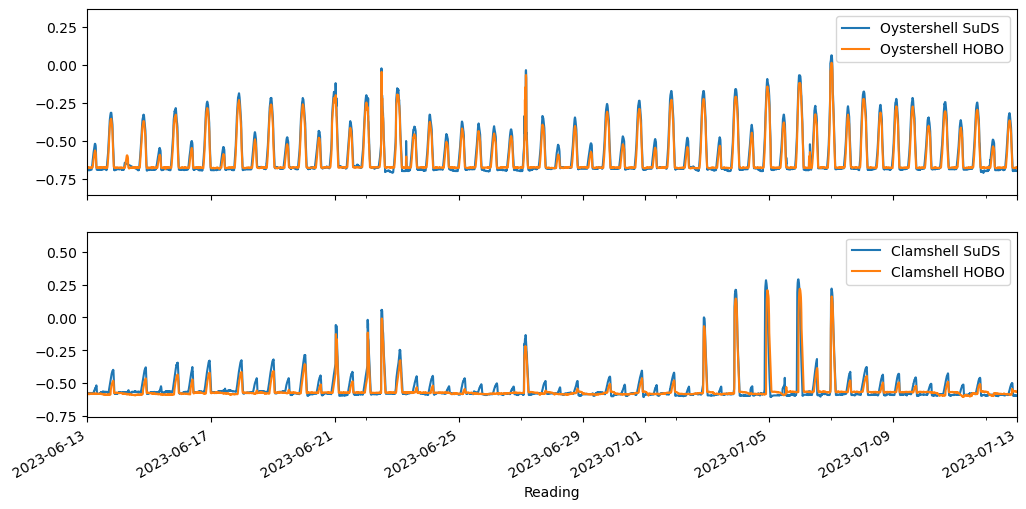

In [187]:
start = datetime(2023, 6, 13)
end = datetime(2023, 7, 13)

fig, (axis1, axis2) = plt.subplots(nrows=2, figsize=(12, 6), sharex = True) 

cb03sudsDF['SUDS WL (m above road)'].plot(ax = axis1, label = 'Oystershell SuDS') #color = wlSuds, linewidth = lwSuds, ls = ltSuds, 
cb03df["HOBO WL rel to road (m)"].plot(ax = axis1, label = 'Oystershell HOBO') 

cb01sudsDF['SUDS WL (m above road)'].plot(ax = axis2, label = 'Clamshell SuDS') #color = wlSuds, linewidth = lwSuds, ls = ltSuds, 
cb01df['HOBO WL rel to road (m)'].plot(ax = axis2, label = 'Clamshell HOBO') 

axis1.set_xlim([start, end])
axis2.set_xlim([start, end])

axis1.legend(frameon = True)#, loc = 'upper right', ncol = 3)
axis2.legend(frameon = True)#, loc = 'upper right', ncol = 3)